# EDA

EDA (Exploratory Data Analysis) using Pandas and Matplotlib (3.5.1 or above).

In [1]:
# read the titanic train.csv file into a dataframe
import pandas as pd
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
# show the percentage of the passengers that boarded at different ports
df['Embarked'].value_counts(normalize = True)


S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

<AxesSubplot:>

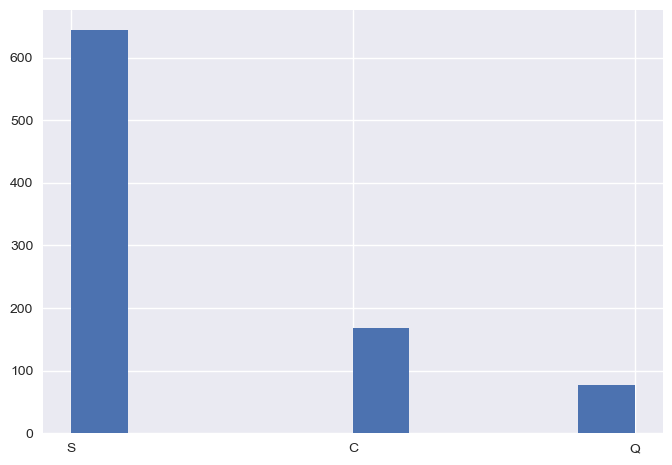

In [3]:
# use seaborn style and pandas plotting to show a histogram of the Embarked column
# a sample diagram is shown below
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fig, ax = plt.subplots()
df['Embarked'].hist(ax = ax)

In [4]:
# show the survival rates by gender
# hint: get all survivors, then count how many female and male, etc.
Survival = df[df['Survived'] == 1]['Sex'].value_counts()
Pessenger_gender = df['Sex'].value_counts()
survival_rates_male = float(Survival.loc[['male']] / Pessenger_gender.loc[['male']])
survival_rates_female = float(Survival.loc[['female']] / Pessenger_gender.loc[['female']])
print(f'The survive rate of female is {survival_rates_female:.2%}, and that of male is {survival_rates_male:.2%}')

The survive rate of female is 74.20%, and that of male is 18.89%


<AxesSubplot:>

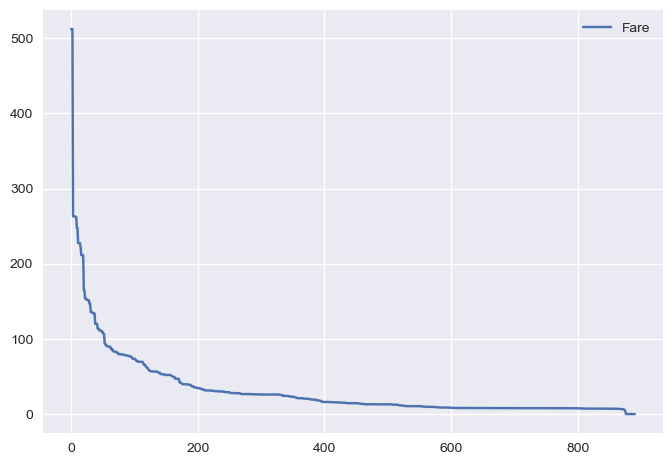

In [5]:
# show a line chart of the ticket price, sorted in descending order
# a sample diagram is shown below
from matplotlib.pyplot import axis


df['Fare'].sort_values(ascending = False).reset_index().drop(['index'],axis=1).plot()



![output](https://user-images.githubusercontent.com/595772/158029862-809dcf1a-76be-492e-9594-e30780b4e88d.png)



Text(0, 0.5, 'Fare')

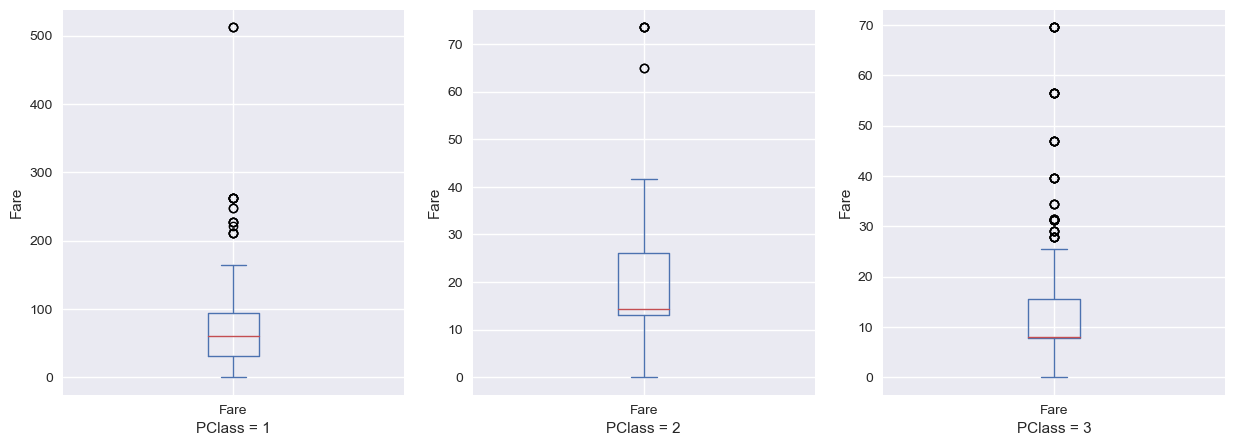

In [6]:
# create a figure with three subplots, size should be (15, 5)
# show the box plot for ticket price with different classes
# you need to set the x labels and y labels
# a sample diagram is shown below
fig, ax = plt.subplots(1, 3, figsize = (15,5))
df[df['Pclass'] == 1]['Fare'].plot.box(ax = ax[0])
df[df['Pclass'] == 2]['Fare'].plot.box(ax = ax[1])
df[df['Pclass'] == 3]['Fare'].plot.box(ax = ax[2])
ax[0].set_xlabel('PClass = 1')
ax[0].set_ylabel('Fare')
ax[1].set_xlabel('PClass = 2')
ax[1].set_ylabel('Fare')
ax[2].set_xlabel('PClass = 3')
ax[2].set_ylabel('Fare')

![output](https://user-images.githubusercontent.com/595772/158030013-2796b628-5f44-4b09-bed4-c4ab2feb8f3a.png)


In [7]:
df[df['Survived'] == 1]['Survived'].value_counts()

1    342
Name: Survived, dtype: int64

In [8]:
df.groupby('Pclass')['Survived'].value_counts()[(1,)]

Survived
1    136
0     80
Name: Survived, dtype: int64

In [9]:
# for people with different ticket class, which ticket class group has the highest survival rate?
# for example, you should show: for people with ticket class ?, the survival rate is the highest, which is ?
# hint: you need groupby first and then use some aggregation function
survive_rate_1 = df[df['Survived'] == 1].groupby('Pclass')['Survived'].value_counts()[(1,1)] / df.groupby('Pclass')['Survived'].value_counts()[(1,)].sum()
survive_rate_2 = df[df['Survived'] == 1].groupby('Pclass')['Survived'].value_counts()[(2,1)] / df.groupby('Pclass')['Survived'].value_counts()[(2,)].sum()
survive_rate_3 = df[df['Survived'] == 1].groupby('Pclass')['Survived'].value_counts()[(3,1)] / df.groupby('Pclass')['Survived'].value_counts()[(3,)].sum()
all_survive_rate = pd.Series([survive_rate_1, survive_rate_2, survive_rate_3], ['PClass 1', 'PClass 2', 'PClass 3'])
print(f'For people with {all_survive_rate.idxmax()}, the survival rate is the highest, which is {all_survive_rate.max():.2%}')


For people with PClass 1, the survival rate is the highest, which is 62.96%


<AxesSubplot:xlabel='Pclass,Survived'>

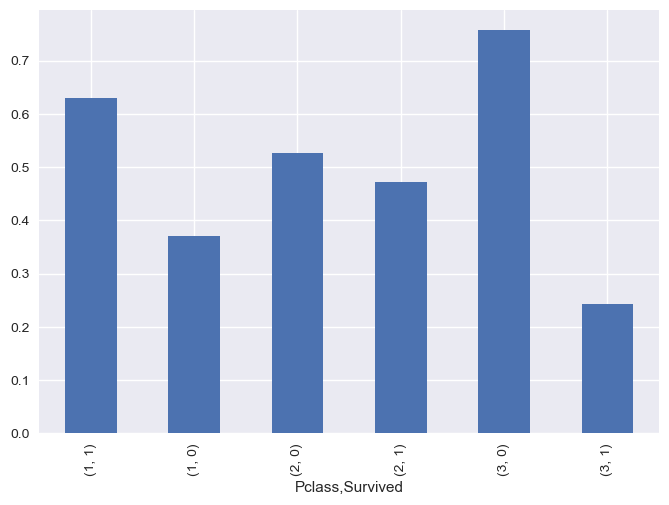

In [10]:
# create a bar plot based on the previous question to show different survival rate by different ticket class
# no need to change the default ticks and tick labels
# a sample diagram is shown below
df[['Survived','Pclass']].groupby('Pclass').value_counts(normalize = True).plot.bar()

![output](https://user-images.githubusercontent.com/595772/158030040-263e699c-04c4-4c29-9bbe-730ee944b5f2.png)
